# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from xgboost import XGBClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### XGBoost

In [3]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [5]:
param_distributions_xgb = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

In [7]:
df_xgb, model_xgb, params_xgb = runner.search_params(
    model=xgb_model,
    params=param_distributions_xgb,
    X_train=X_train,
    Y_train=Y_train,
    max_combinations=1000
)

Num combinações de hiperparâmetros: 1000
Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Tempo de busca: 2.61s


Cross-Validation (5-folds): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]


In [8]:
df_xgb

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
2,3,0.905692,0.971162,0.910348,0.972466,0.891034,0.966928,0.877376,0.963224,"[0.0, 0.06599208095028597, 1.0]","[0.0, 0.8773758430410791, 1.0]"
0,1,0.903082,0.971250,0.906786,0.972720,0.887585,0.967190,0.880515,0.962299,"[0.0, 0.07435107787065552, 1.0]","[0.0, 0.8805147058823529, 1.0]"
1,2,0.901460,0.971997,0.903689,0.973490,0.885156,0.968105,0.887868,0.962912,"[0.0, 0.08494718309859155, 1.0]","[0.0, 0.8878676470588235, 1.0]"
4,5,0.900625,0.973926,0.903945,0.975155,0.884509,0.970158,0.880441,0.966442,"[0.0, 0.07919049714034315, 1.0]","[0.0, 0.8804414469650521, 1.0]"
3,4,0.896240,0.973030,0.899846,0.974515,0.879433,0.969337,0.874310,0.963990,"[0.0, 0.0818301803783546, 1.0]","[0.0, 0.874310239117106, 1.0]"


In [9]:
runner.save_model(model_xgb, "xgBoost")
runner.save_results(df_xgb, "xgBoost")

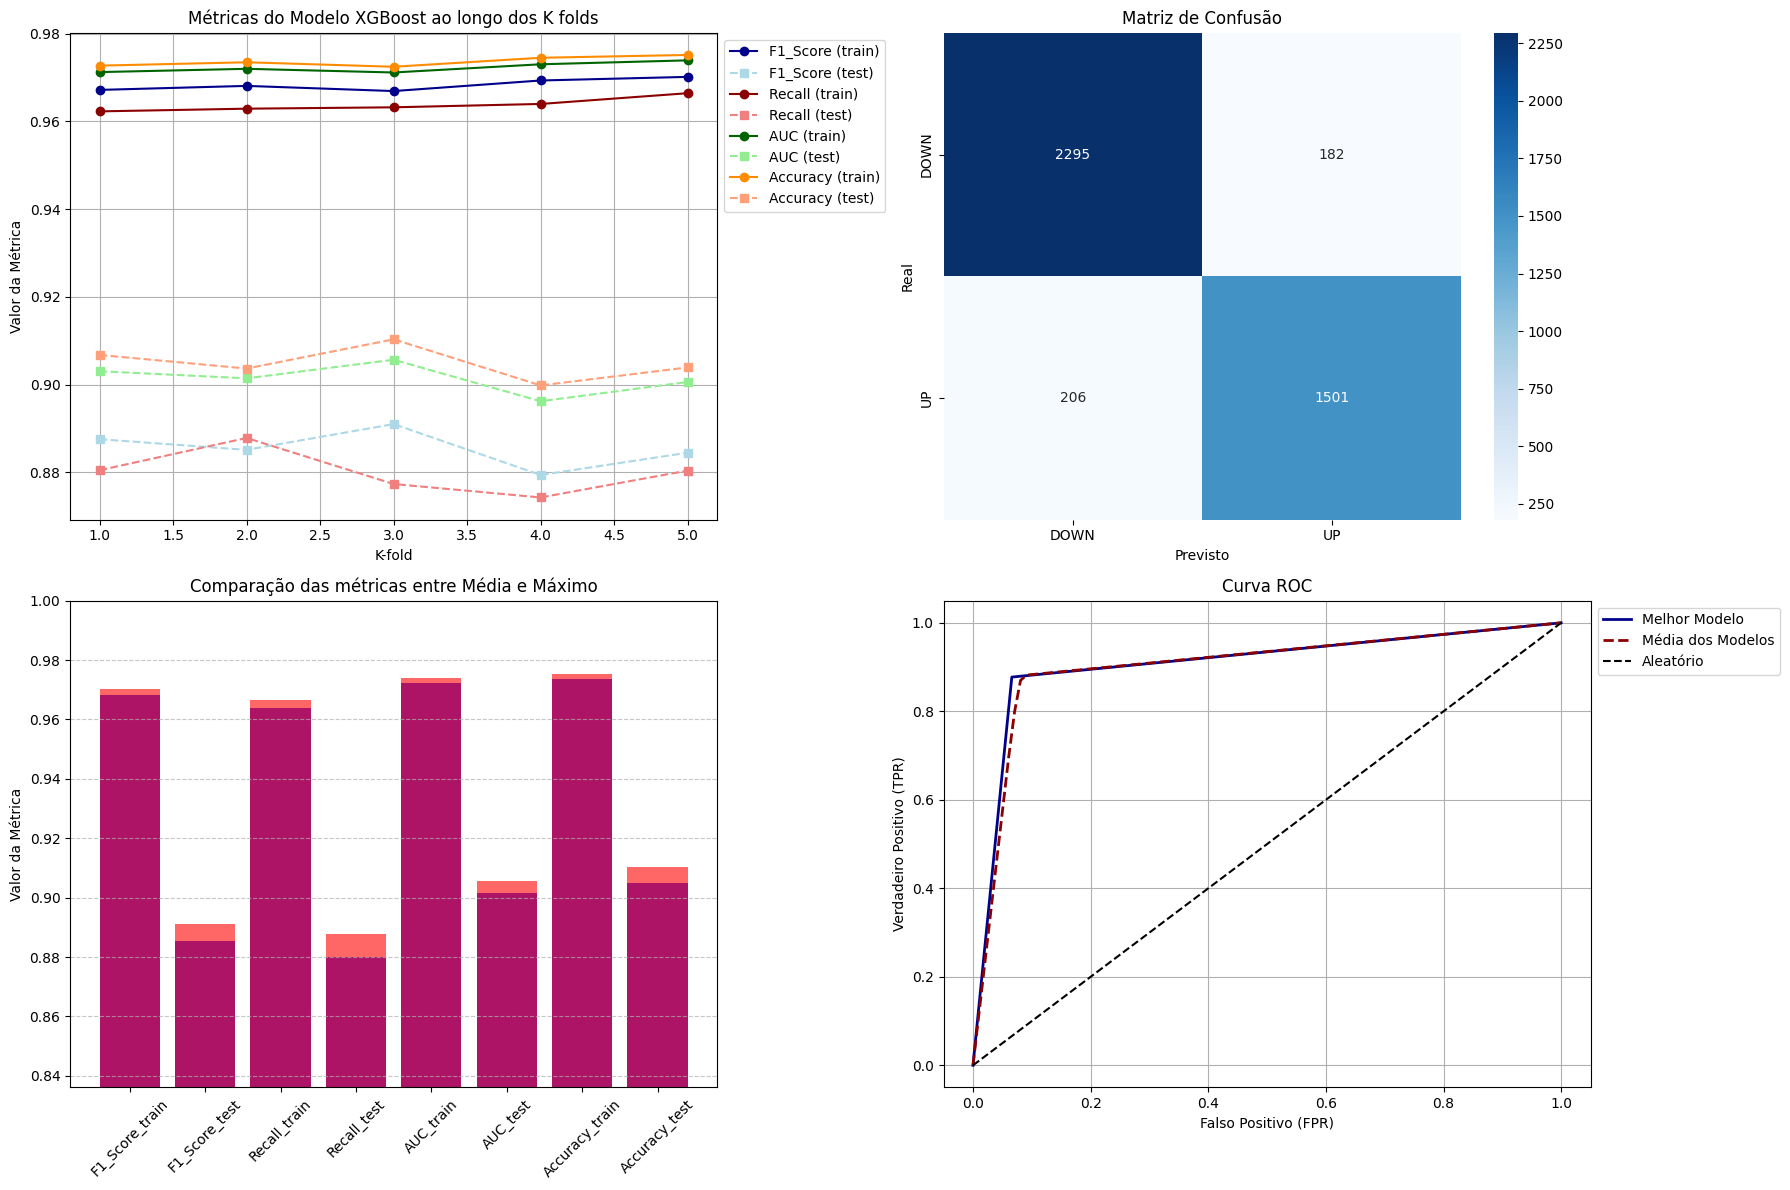

In [11]:
plots.model_evaluate(model_xgb, df_xgb, X_test, Y_test, model_name="XGBoost")